In [1]:
from statsmodels.tsa.ar_model import AutoReg
import pandas as pd 
from sklearn.metrics import mean_squared_error
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data/daily-total-female-births.csv')
df.head()


,Date,Births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


# AR MODEL

In [60]:
Y = df.Births.values
train, test = Y[:len(Y)-7], Y[len(Y)-7:]

In [61]:
AR_model = AutoReg(train, lags=2)
AR_results = AR_model.fit()

In [79]:
Y_hat = AR_results.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)

In [80]:
for y_hat, y_true in zip(Y_hat, test):
    print(f'Predicted={y_hat} \tExpected={y_true}')

Predicted=41.009982996211406 	Expected=44
Predicted=41.3395707860348 	Expected=34
Predicted=41.741049087971845 	Expected=37
Predicted=41.8524930508191 	Expected=52
Predicted=41.91850636281712 	Expected=48
Predicted=41.94330911921793 	Expected=55
Predicted=41.95535989900887 	Expected=50


In [64]:
np.sqrt(mean_squared_error(test, Y_hat))

8.110283777968577

In [65]:
AR_results.params

array([29.46548462,  0.18468755,  0.11315929])

In [66]:
AR_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                      y   No. Observations:                  358
Model:                     AutoReg(2)   Log Likelihood               -1203.234
Method:               Conditional MLE   S.D. of innovations              7.106
Date:                Wed, 27 Dec 2023   AIC                           2414.467
Time:                        14:13:16   BIC                           2429.967
Sample:                             2   HQIC                          2420.633
                                  358                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         29.4655      2.792     10.554      0.000      23.993      34.938
y.L1           0.1847      0.053      3.513      0.000       0.082       0.288
y.L2           0.1132      0.053      2.155      0.031       0.010       0.216
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.2666           +0.0000j            2.2666            0.0000
AR.2           -3.8988           +0.0000j            3.8988            0.5000
-----------------------------------------------------------------------------
"""

In [83]:
train

array([35, 32, 30, 31, 44, 29, 45, 43, 38, 27, 38, 33, 55, 47, 45, 37, 50,
       43, 41, 52, 34, 53, 39, 32, 37, 43, 39, 35, 44, 38, 24, 23, 31, 44,
       38, 50, 38, 51, 31, 31, 51, 36, 45, 51, 34, 52, 47, 45, 46, 39, 48,
       37, 35, 52, 42, 45, 39, 37, 30, 35, 28, 45, 34, 36, 50, 44, 39, 32,
       39, 45, 43, 39, 31, 27, 30, 42, 46, 41, 36, 45, 46, 43, 38, 34, 35,
       56, 36, 32, 50, 41, 39, 41, 47, 34, 36, 33, 35, 38, 38, 34, 53, 34,
       34, 38, 35, 32, 42, 34, 46, 30, 46, 45, 54, 34, 37, 35, 40, 42, 58,
       51, 32, 35, 38, 33, 39, 47, 38, 52, 30, 34, 40, 35, 42, 41, 42, 38,
       24, 34, 43, 36, 55, 41, 45, 41, 37, 43, 39, 33, 43, 40, 38, 45, 46,
       34, 35, 48, 51, 36, 33, 46, 42, 48, 34, 41, 35, 40, 34, 30, 36, 40,
       39, 45, 38, 47, 33, 30, 42, 43, 41, 41, 59, 43, 45, 38, 37, 45, 42,
       57, 46, 51, 41, 47, 26, 35, 44, 41, 42, 36, 45, 45, 45, 47, 38, 42,
       35, 36, 39, 45, 43, 47, 36, 41, 50, 39, 41, 46, 64, 45, 34, 38, 44,
       48, 46, 44, 37, 39

In [85]:
test

array([44, 34, 37, 52, 48, 55, 50], dtype=int64)

In [81]:
Y_hat

array([41.009983  , 41.33957079, 41.74104909, 41.85249305, 41.91850636,
       41.94330912, 41.9553599 ])

In [84]:
29.46548462 + 0.18468755*38+0.11315929*40

41.00998312

In [86]:
29.46548462 + 0.18468755*41.00998312+0.11315929*38

41.33957094797416

In [91]:
Y_hat_sim = list(train[-2:])
c = 29.46548462
phi_1 = 0.18468755
phi_2 = 0.11315929*
for i in range(7):
    predict = 29.46548462 + 0.18468755*Y_hat_sim[-1] + 0.11315929*Y_hat_sim[-2]
    Y_hat_sim.append(predict)

In [94]:
Y_hat_sim[2:], Y_hat

([41.00998312,
  41.33957094797416,
  41.74104926920371,
  41.85249324133591,
  41.918506557292,
  41.94330931564456,
  41.95536009628208],
 array([41.009983  , 41.33957079, 41.74104909, 41.85249305, 41.91850636,
        41.94330912, 41.9553599 ]))

f:\Vendors\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
f:\Vendors\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
f:\Vendors\Anaconda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
f:\Vendors\Anaconda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode

<Axes: >

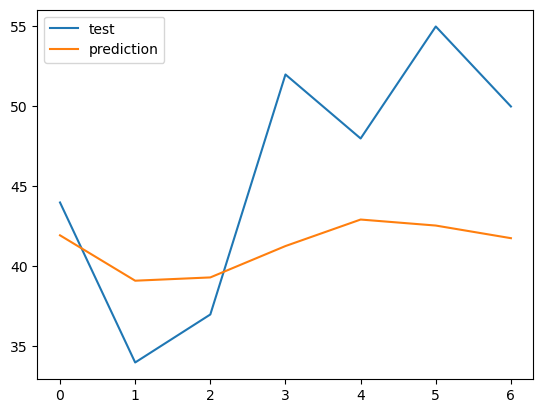

In [66]:
sns.lineplot(test, label='test')
sns.lineplot(Y_hat, label='prediction')

In [62]:
model = AutoReg(train, lags=0)
model_fit = model.fit()
print(model_fit.params)
AR_0 = model_fit.predict(start=1, end=len(train)-1)

[41.90782123]


In [68]:
tt = train[1:] - AR_0

In [74]:
model = AutoReg(train, lags=1)
model_fit = model.fit()
print(model_fit.params)
AR_1 = model_fit.predict()

[33.05162163  0.21173211]


In [64]:
model = AutoReg(train, lags=2)
model_fit = model.fit()
print(model_fit.params)
AR_2 = model_fit.predict(start=1, end=len(train)-1)

[29.46548462  0.18468755  0.11315929]


In [76]:
train[1:].mean()

41.92717086834734

In [77]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                      y   No. Observations:                  358
Model:                     AutoReg(1)   Log Likelihood               -1209.131
Method:               Conditional MLE   S.D. of innovations              7.156
Date:                Tue, 26 Dec 2023   AIC                           2424.261
Time:                        16:55:38   BIC                           2435.894
Sample:                             1   HQIC                          2428.888
                                  358                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         33.0516      2.199     15.029      0.000      28.741      37.362
y.L1           0.2117      0.052      4.097      0.000       0.110       0.313
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            4.7229           +0.0000j            4.7229            0.0000
-----------------------------------------------------------------------------
"""

In [65]:
import matplotlib.pyplot as plt

f:\Vendors\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
f:\Vendors\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
f:\Vendors\Anaconda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
f:\Vendors\Anaconda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode

<Axes: >

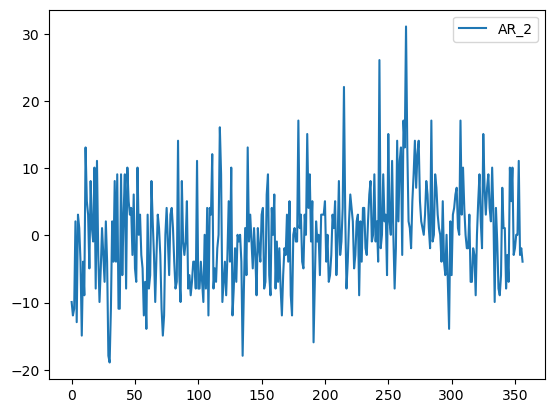

In [70]:
# sns.lineplot(train[1:], label='original')
# sns.lineplot(AR_1, label='AR_1')
# sns.lineplot(AR_2, label='AR_2')
sns.lineplot(tt, label='AR_2')

# plt.title('AR(1)')

f:\Vendors\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
f:\Vendors\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
f:\Vendors\Anaconda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
f:\Vendors\Anaconda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode

Text(0.5, 1.0, 'AR(2)')

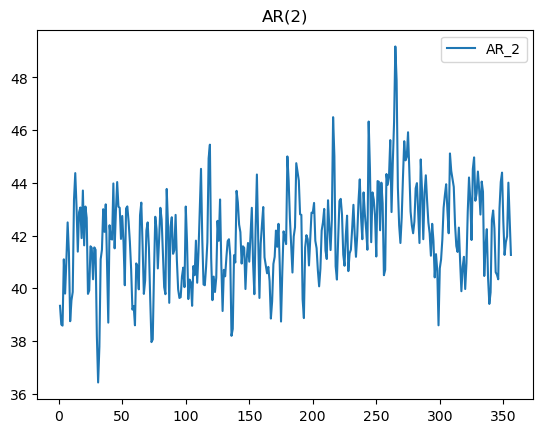

In [49]:
# sns.lineplot(train[1:], label='original')
plt.title('AR(2)')

In [50]:
0.21173211*35+33.05162163

40.46224548

In [29]:
train

array([35, 32, 30, 31, 44, 29, 45, 43, 38, 27, 38, 33, 55, 47, 45, 37, 50,
       43, 41, 52, 34, 53, 39, 32, 37, 43, 39, 35, 44, 38, 24, 23, 31, 44,
       38, 50, 38, 51, 31, 31, 51, 36, 45, 51, 34, 52, 47, 45, 46, 39, 48,
       37, 35, 52, 42, 45, 39, 37, 30, 35, 28, 45, 34, 36, 50, 44, 39, 32,
       39, 45, 43, 39, 31, 27, 30, 42, 46, 41, 36, 45, 46, 43, 38, 34, 35,
       56, 36, 32, 50, 41, 39, 41, 47, 34, 36, 33, 35, 38, 38, 34, 53, 34,
       34, 38, 35, 32, 42, 34, 46, 30, 46, 45, 54, 34, 37, 35, 40, 42, 58,
       51, 32, 35, 38, 33, 39, 47, 38, 52, 30, 34, 40, 35, 42, 41, 42, 38,
       24, 34, 43, 36, 55, 41, 45, 41, 37, 43, 39, 33, 43, 40, 38, 45, 46,
       34, 35, 48, 51, 36, 33, 46, 42, 48, 34, 41, 35, 40, 34, 30, 36, 40,
       39, 45, 38, 47, 33, 30, 42, 43, 41, 41, 59, 43, 45, 38, 37, 45, 42,
       57, 46, 51, 41, 47, 26, 35, 44, 41, 42, 36, 45, 45, 45, 47, 38, 42,
       35, 36, 39, 45, 43, 47, 36, 41, 50, 39, 41, 46, 64, 45, 34, 38, 44,
       48, 46, 44, 37, 39

### Moving Average Model

In [3]:
np.random.seed(42)

In [4]:
samples = np.random.normal(0, 1, size=100)


In [5]:
samples[-1]

-0.23458713337514692

In [6]:
MA1 = np.zeros(len(samples))
MA1[0] = 20 + samples[0]
for i in range(1, len(MA1)):
    MA1[i] = 20 + samples[i] + 0.8*samples[i-1]

In [7]:
MA2 = np.zeros(len(samples))
MA2[0] = samples[0]
MA2[1] = samples[1] - samples[0]
for i in range(2, len(MA2)):
    MA2[i] = samples[i] - samples[i-1] + 0.8*samples[i-2]

f:\Vendors\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
f:\Vendors\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
f:\Vendors\Anaconda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
f:\Vendors\Anaconda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode

Text(0.5, 1.0, 'MA(1)')

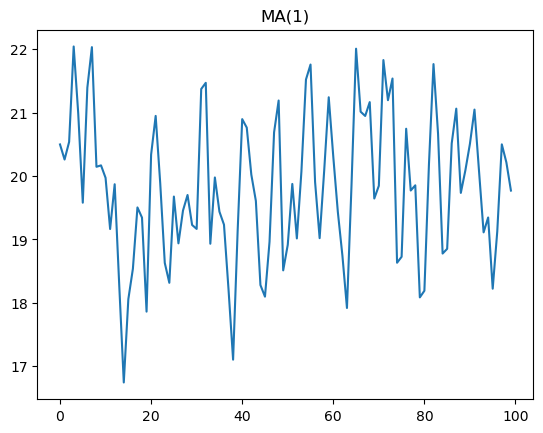

In [8]:

sns.lineplot(MA1)
plt.title("MA(1)")

f:\Vendors\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
f:\Vendors\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
f:\Vendors\Anaconda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
f:\Vendors\Anaconda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode

<Axes: >

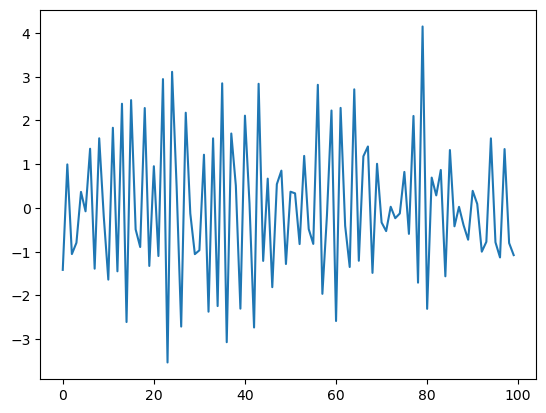

In [26]:
sns.lineplot(MA2)

In [9]:
from statsmodels.tsa.arima.model import ARIMA


In [70]:
MA_model = ARIMA(train, order=(0, 0, 2))


In [71]:
MA_results = MA_model.fit()

In [77]:

Y_hat = MA_results.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for y_hat, y_true in zip(Y_hat, test):
    print(f'Predicted={y_hat} \tExpected={y_true}')

Predicted=41.11548396873163 	Expected=44
Predicted=41.5656013608698 	Expected=34
Predicted=41.89874024020355 	Expected=37
Predicted=41.89874024020355 	Expected=52
Predicted=41.89874024020355 	Expected=48
Predicted=41.89874024020355 	Expected=55
Predicted=41.89874024020355 	Expected=50


In [74]:
MA_results.params

array([41.89874024,  0.17900771,  0.11330768, 50.91597007])

In [75]:
print('RMSE:', np.sqrt(mean_squared_error(test, Y_hat)))

RMSE: 8.15992514853609


f:\Vendors\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
f:\Vendors\Anaconda\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
f:\Vendors\Anaconda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
f:\Vendors\Anaconda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode

<Axes: >

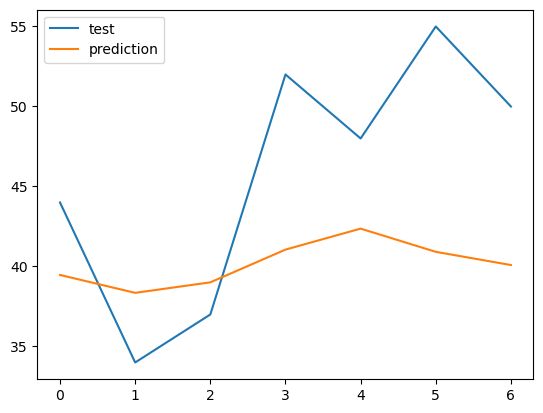

In [38]:
sns.lineplot(test, label='test')
sns.lineplot(Y_hat, label='prediction')

In [43]:
AR_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                      y   No. Observations:                  358
Model:                    AutoReg(29)   Log Likelihood               -1086.663
Method:               Conditional MLE   S.D. of innovations              6.580
Date:                Wed, 27 Dec 2023   AIC                           2235.326
Time:                        14:08:25   BIC                           2353.004
Sample:                            29   HQIC                          2282.271
                                  358                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.2060      5.596      1.824      0.068      -0.762      21.174
y.L1           0.1444      0.055      2.616      0.009       0.036       0.253
y.L2           0.0736      0.056      1.323      0.186      -0.035       0.183
y.L3           0.0163      0.056      0.293      0.769      -0.093       0.125
y.L4           0.0404      0.056      0.724      0.469      -0.069       0.150
y.L5           0.0436      0.056      0.782      0.434      -0.066       0.153
y.L6          -0.0210      0.056     -0.377      0.706      -0.130       0.088
y.L7           0.1380      0.056      2.478      0.013       0.029       0.247
y.L8           0.0669      0.056      1.196      0.232      -0.043       0.177
y.L9          -0.0407      0.055     -0.745      0.456      -0.148       0.066
y.L10          0.0176      0.054      0.324      0.746      -0.089       0.124
y.L11          0.0280      0.055      0.512      0.609      -0.079       0.135
y.L12         -0.0913      0.055     -1.670      0.095      -0.198       0.016
y.L13         -0.0489      0.055     -0.896      0.370      -0.156       0.058
y.L14         -0.0011      0.055     -0.020      0.984      -0.108       0.106
y.L15          0.0474      0.055      0.869      0.385      -0.059       0.154
y.L16          0.0400      0.055      0.734      0.463      -0.067       0.147
y.L17         -0.0501      0.054     -0.924      0.356      -0.156       0.056
y.L18          0.0284      0.054      0.526      0.599      -0.077       0.134
y.L19          0.0270      0.054      0.499      0.618      -0.079       0.133
y.L20          0.0153      0.054      0.283      0.777      -0.091       0.121
y.L21          0.2228      0.054      4.127      0.000       0.117       0.329
y.L22          0.0117      0.055      0.212      0.832      -0.097       0.120
y.L23         -0.0482      0.055     -0.877      0.380      -0.156       0.059
y.L24          0.0311      0.055      0.569      0.569      -0.076       0.138
y.L25         -0.0388      0.055     -0.710      0.478      -0.146       0.068
y.L26         -0.0178      0.055     -0.326      0.744      -0.125       0.089
y.L27          0.0678      0.055      1.243      0.214      -0.039       0.175
y.L28          0.0521      0.055      0.954      0.340      -0.055       0.159
y.L29          0.0036      0.054      0.067      0.947      -0.103       0.110
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1             1.0220           -0.0000j            1.0220           -0.0000
AR.2             1.0247           -0.2672j            1.0590           -0.0406
AR.3             1.0247           +0.2672j            1.0590            0.0406
AR.4             1.0734           -0.4786j            1.1753           -0.0668
AR

In [45]:
AR_results.predict()

array([        nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan, 38.56054964,
       35.0986508 , 35.8037326 , 37.141574  , 39.61509312, 41.37755658,
       41.10405985, 40.94853762, 40.42134239, 37.99060473, 39.08600754,
       44.1019344 , 40.50862883, 44.10960607, 43.74862203, 43.34119971,
       39.66953245, 39.84002518, 43.089634  , 42.31097332, 41.91913711,
       42.53058005, 38.60701825, 37.55231275, 40.94857795, 42.18656623,
       42.7486973 , 45.07009156, 39.95288001, 40.76195265, 33.95347031,
       36.5897075 , 43.81121758, 38.96556458, 40.60891779, 43.99429638,
       37.79863743, 41.92796207, 39.99700099, 40.40135045, 42.99

In [41]:
MA_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  358
Model:                ARIMA(0, 0, 29)   Log Likelihood               -1186.999
Date:                Wed, 27 Dec 2023   AIC                           2435.998
Time:                        14:07:42   BIC                           2556.294
Sample:                             0   HQIC                          2483.840
                                - 358                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         41.7396      0.907     46.029      0.000      39.962      43.517
ma.L1          0.1278      0.107      1.195      0.232      -0.082       0.337
ma.L2          0.0643      0.097      0.664      0.507      -0.126       0.254
ma.L3          0.0481      0.096      0.502      0.616      -0.140       0.236
ma.L4          0.0312      0.100      0.313      0.754      -0.164       0.226
ma.L5          0.0725      0.106      0.686      0.493      -0.135       0.280
ma.L6          0.0134      0.098      0.137      0.891      -0.178       0.205
ma.L7          0.1665      0.089      1.875      0.061      -0.008       0.341
ma.L8          0.1119      0.089      1.263      0.207      -0.062       0.286
ma.L9          0.0235      0.093      0.253      0.800      -0.159       0.206
ma.L10        -0.0134      0.088     -0.153      0.878      -0.185       0.159
ma.L11         0.0400      0.088      0.453      0.651      -0.133       0.213
ma.L12        -0.0791      0.082     -0.962      0.336      -0.240       0.082
ma.L13        -0.0335      0.082     -0.409      0.683      -0.194       0.127
ma.L14         0.0041      0.085      0.048      0.962      -0.162       0.170
ma.L15         0.0652      0.087      0.749      0.454      -0.105       0.236
ma.L16         0.0227      0.081      0.280      0.780      -0.136       0.182
ma.L17        -0.0329      0.084     -0.394      0.694      -0.197       0.131
ma.L18        -0.0108      0.085     -0.126      0.899      -0.178       0.156
ma.L19         0.0428      0.085      0.503      0.615      -0.124       0.209
ma.L20        -0.0325      0.084     -0.386      0.699      -0.197       0.132
ma.L21         0.2598      0.077      3.393      0.001       0.110       0.410
ma.L22         0.0331      0.067      0.491      0.623      -0.099       0.165
ma.L23         0.0454      0.074      0.614      0.540      -0.100       0.191
ma.L24        -0.0195      0.067     -0.292      0.770      -0.151       0.112
ma.L25         0.0627      0.066      0.948      0.343      -0.067       0.193
ma.L26        -0.0054      0.070     -0.077      0.939      -0.142       0.131
ma.L27         0.1512      0.064      2.350      0.019       0.025       0.277
ma.L28         0.0905      0.058      1.567      0.117      -0.023       0.204
ma.L29         0.1554      0.070      2.207      0.027       0.017       0.293
sigma2        43.7887      5.308      8.249      0.000      33.385      54.193
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                 9.99
Prob(Q):                              0.87   Prob(JB):                         0.01
Heteroskedasticity (H):               0.98   Skew:                             0.40
Prob(H) (two-sided):                  0.92   Kurtosis:                         3.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using t